In [17]:
#Dependencies
import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# The path to our CSV file
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas
su_vs_gdp_o_df = pd.read_csv(file_gdp)
su_vs_gdp_o_df.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,year_gdp,gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2160000000,$796.00,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2160000000,$796.00,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2160000000,$796.00,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2160000000,$796.00,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2160000000,$796.00,Boomers


In [19]:
su_vs_gdp_o_df.columns

Index(['index', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'year_gdp', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [20]:
su_vs_gdp_o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
index                 27820 non-null int64
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
year_gdp              27820 non-null int64
gdp_per_capita ($)    27820 non-null object
generation            27820 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.5+ MB


In [21]:
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita ($)':'first'}).reset_index()
su_vs_gdp_df.head()

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita ($)
0,Albania1987,Albania,1987,73,2709600,31.85,2160000000,$796.00
1,Albania1988,Albania,1988,63,2764300,32.46,2130000000,$769.00
2,Albania1989,Albania,1989,68,2803100,33.40,2340000000,$833.00
3,Albania1992,Albania,1992,47,2822500,18.00,709000000,$251.00
4,Albania1993,Albania,1993,73,2807300,32.56,1230000000,$437.00


In [22]:
su_vs_gdp_df.to_csv('cleaned_su_vs_gdp.csv')

In [23]:
file_gdp2 = "cleaned_su_vs_gdp.csv"

su_vs_gdp_c_df = pd.read_csv(file_gdp2)
su_vs_gdp_c_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita ($)
0,0,Albania1987,Albania,1987,73,2709600,31.85,2160000000,$796.00
1,1,Albania1988,Albania,1988,63,2764300,32.46,2130000000,$769.00
2,2,Albania1989,Albania,1989,68,2803100,33.40,2340000000,$833.00
3,3,Albania1992,Albania,1992,47,2822500,18.00,709000000,$251.00
4,4,Albania1993,Albania,1993,73,2807300,32.56,1230000000,$437.00


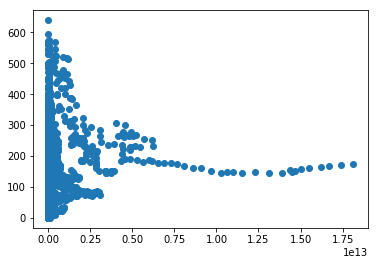

In [28]:
x_axis = su_vs_gdp_c_df['year_gdp']
y_axis = su_vs_gdp_c_df['suicides/100k pop']


plt.scatter(x_axis, y_axis)